# Setup

Import libraries and create dataframes.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 4
sns.set_style('whitegrid')

In [4]:
# import data
address = '../working_data/all-metal-music-cleaned.csv'
metal_df = pd.read_csv(address)

metal_df.head()

,artist,asin,media,review_count,star_rating,title,year,genre
0,Cannibal Corpse,B09CH25B33,Vinyl,97,4.9,Butchered At Birth,2021,alternative metal
1,Oranssi Pazuzu,B084DGQMZW,"Audio CD,MP3 Music,Vinyl",90,4.9,Mestarin Kynsi,2020,alternative metal
2,Nile,B0081N9T4G,"MP3 Music,Audio CD",90,4.9,Ithyphallic,2007,alternative metal
3,Melvins,B000051753,"Audio CD,MP3 Music,Vinyl",89,4.9,Gluey Porch Treatments,2015,alternative metal
4,Dog Fashion Disco,B000EOTEFE,"Audio CD,MP3 Music,Vinyl",86,4.9,Adultery,2006,alternative metal


# Create graph based on data

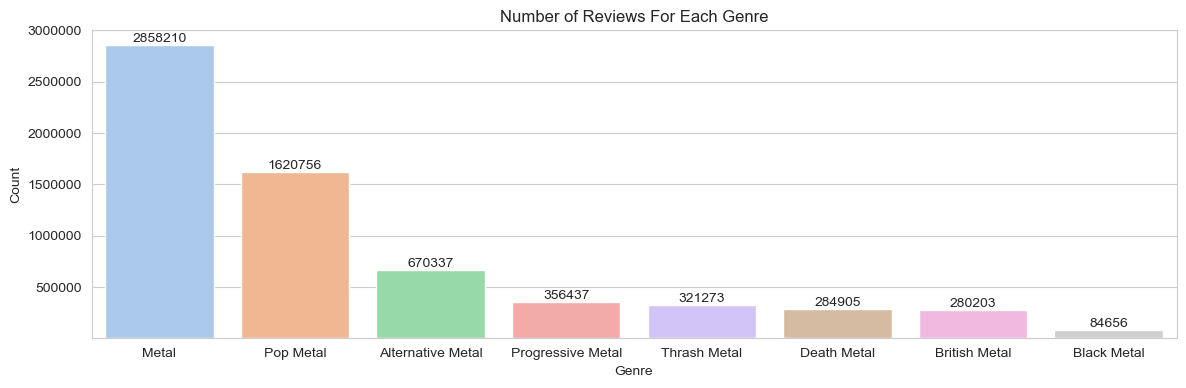

In [ ]:
# get sum of review count, grouped by genre
grouped = metal_df.groupby('genre')
genre_review_count = grouped.sum('review_count')

# convert genre labels to proper casing
genre_review_count.index = genre_review_count.index.str.title()

# sort values descending
genre_review_count = genre_review_count.sort_values(by='review_count', ascending=False)

# create plot based on grouped data
plot = sns.barplot(
    data=genre_review_count, 
    x='genre', 
    y='review_count',
    hue='genre',
    palette='pastel',
    errorbar=None)

# set y-axis labels
ticks = [500000, 1000000, 1500000, 2000000, 2500000, 3000000]
plot.set_yticks(ticks)
plot.set_yticklabels(ticks)

# set plot title and labels
plot.set(title='Number of Reviews For Each Genre', xlabel='Genre', ylabel='Count')

# display count above each genre, rounded
for i in plot.containers:
    plot.bar_label(i, fmt='%.0f')

# save plot as image for readme
plt.savefig('genre_comparison.png', bbox_inches='tight')

plt.show()
